In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [164]:
df = pd.read_csv("./1632300362534233.csv")
# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [165]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [166]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [167]:
df = df.dropna(subset=['Address'])

In [168]:
df = df[df['Address'].str.strip() != '']

In [169]:
(df['Address'].str.strip() == '').sum()

0

In [170]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [171]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [172]:
df[ df['Area'].str.contains('[^0-9]', regex=True, na=False) ]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00


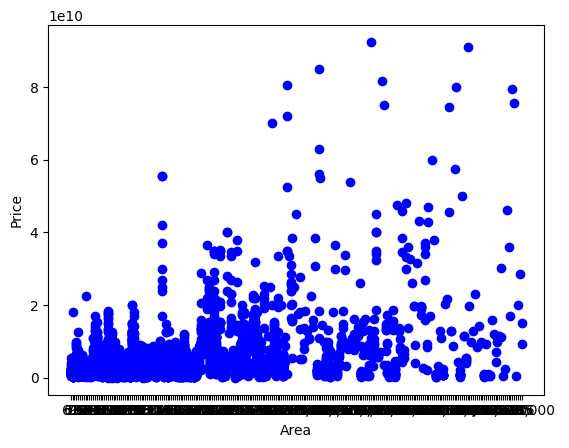

In [173]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [174]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

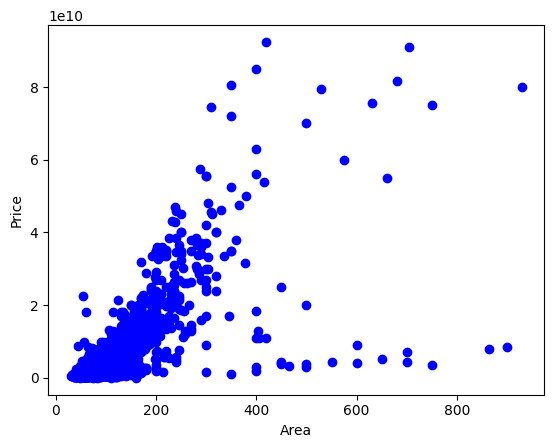

In [175]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [176]:
df['Area'].isna().sum()

6

In [177]:
Q1, Q3 = np.quantile(df['Area'].dropna(), [0.25, 0.75])

In [178]:
IQR = Q3 - Q1
Max_IQR = Q3 + 1.5 * IQR
Min_IQR = Q1 - 1.5 * IQR

In [179]:
# از loc استفاده میکنیم چون میخواهیم مقدار دهی کنیم
df.loc[df['Area'] < Min_IQR, 'Area'] = np.nan #اونهاییکه از مینیمم کمتر هستند  را nan قرار بده
df.loc[df['Area'] > Max_IQR, 'Area'] = np.nan

In [180]:
df['Area'].isna().sum()

244

In [181]:
df = df.dropna(subset=['Area'])

In [182]:
df['Area'].isna().sum()

0

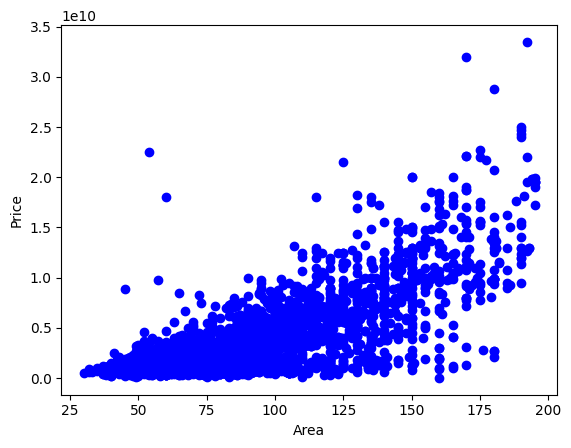

In [183]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [184]:
msk = np.random.rand(len(df)) < 0.8 
train = df[msk]
test = df[~msk]

In [185]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x,train_y)
# The Coefficients
print(regr)
print ('Coefficients : ',regr.coef_) #شیب
print ('Intercept : ',regr.intercept_) #از کجا شروع بشه

LinearRegression()
Coefficients :  [[84767991.20396335]]
Intercept :  [-3.9866547e+09]


Text(0, 0.5, 'Price')

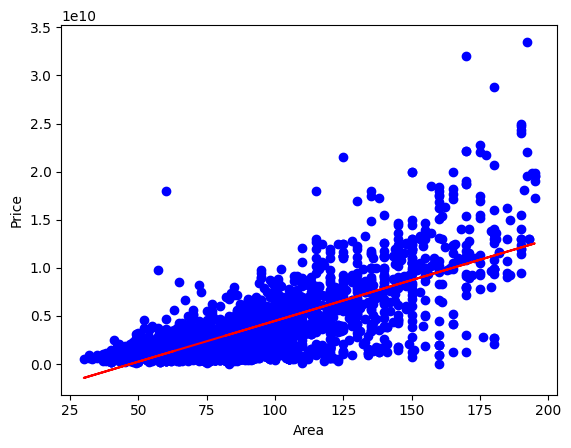

In [186]:
plt.scatter(train.Area,train.Price,color = 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('Area')
plt.ylabel('Price')

## Evaluation

In [145]:
from sklearn.metrics import r2_score #r2 is a number between zero and one as it nearer to one means our model is better

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

# if even we want to build a new machine
# regr.predict([4.2])

print( "Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print( "Residual Sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print( "R2-score: %.2f" % r2_score(test_y, test_y_) ) # above 0.75 is good for prediction normally, it's the most important evaluation

Mean absolute error : 1828916035.65
Residual Sum of squares (MSE): 6683194844354482176.00
R2-score: 0.57


### So in result, this simple linear regression is not good , let's try multiple linear Regression :)